## Loading the libraries

In [1]:
import sys
sys.path.insert(0, '../scripts')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions import *
import time
import tqdm

### Loading the data

In [4]:
pd.set_option('display.max_rows',250)
pd.set_option('display.max_columns',250)

In [5]:
start = time.time()
df_main = pd.read_csv('../notebooks/meth_v3.csv')
end = time.time()
print(f'Time taken is {end-start} seconds to load the dataset')

/var/folders/0q/4w9_419s5jgfsk1krpn17gk00000gn/T/ipykernel_48485/3738534700.py:2: DtypeWarning: Columns (23,27,48,140) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv('../notebooks/meth_v3.csv')


Time taken is 18.721561193466187 seconds to load the dataset


In [6]:
df = df_main.copy()

## Preprocessing the data

**Note:** After doing some basic preprocessing, we decided to merge with the cleaned main file with `POLICY_NUMBER` as the primary key

#### Removing duplicate policies

In [7]:
k =df['POLICY_NUMBER'].nunique()
print(f'There are {k} unique policies in the dataset.')

There are 1033164 unique policies in the dataset.


#### Property Characterstic columns

If the column consists of only category, then it makes no sense to include in the analysis

In [8]:
characteristic_columns=df.columns[df.columns.str.contains('IS|HAS')]
characteristic_columns

Index(['IS_DWELLING_ON_FARM', 'IS_DWELLING_VACANT', 'IS_LOCATED_ON_LANDFILL',
       'IS_ON_BARRIER_ISLAND', 'IS_FIRE_STATION_ON_BARRIER_ISLAND',
       'IS_SHORT_TERM_RENTAL', 'IS_DWELLING_FOR_RENT', 'HAS_POOL',
       'IS_POOL_SCREENED', 'IS_POOL_FENCED', 'HAS_POOL_DIVING_BOARD',
       'HAS_TRAMPOLINE', 'HAS_SKATEBOARD_RAMP', 'HAS_BICYCLE_RAMP',
       'IS_POOL_EMPTY', 'HAS_VICIOUS_ANIMALS',
       'HAS_APPLICANT_HAD_RECENT_FORCLOSURE', 'IS_DWELLING_ON_MASONARY',
       'IS_MOBILE_HOME', 'WINDBORNE_DEBRIS_REGION',
       'DISTANCE_FROM_FIRE_HYDRANT_FT', 'DISTANCE_FROM_FIRE_STATION_MI',
       'IS_RISK_WITHIN_CITY_LIMITS', 'IS_SPECIAL_FLOOD_ZONE',
       'IS_THERE_A_FLOOD_POLICY_IN_EFFECT', 'NUMBER_UNITS_IN_FIRE_DIVISION',
       'SECONDARY_WATER_RESISTANCE', 'PURCHASE_PRICE', 'IS_UNDER_CONSTRUCTION',
       'HAS_SECURITY_GUARD', 'BCEGS_MITIGATION_DISCOUNT', 'WLM_DISCOUNT',
       'IS_WIND_COVERAGE_EXCLUDED', 'VANDALISM_MALICIOUS_MISCHIEF',
       'PURCHASED_LEASED_DATE'],
      dtyp

In [9]:
d={}
for each_col in characteristic_columns:
    k = df[each_col].unique()
    if len(k)<=1:
        d[each_col] = k

In [10]:
d

{'IS_DWELLING_ON_FARM': array(['No'], dtype=object)}

As there is only one category for this categorical variable, you can remove it

In [11]:
df.drop(columns=d.keys(),inplace=True)

In [12]:
## house charactersics
characteristic_columns=df.columns[df.columns.str.contains('IS|HAS')]
characteristic_columns

Index(['IS_DWELLING_VACANT', 'IS_LOCATED_ON_LANDFILL', 'IS_ON_BARRIER_ISLAND',
       'IS_FIRE_STATION_ON_BARRIER_ISLAND', 'IS_SHORT_TERM_RENTAL',
       'IS_DWELLING_FOR_RENT', 'HAS_POOL', 'IS_POOL_SCREENED',
       'IS_POOL_FENCED', 'HAS_POOL_DIVING_BOARD', 'HAS_TRAMPOLINE',
       'HAS_SKATEBOARD_RAMP', 'HAS_BICYCLE_RAMP', 'IS_POOL_EMPTY',
       'HAS_VICIOUS_ANIMALS', 'HAS_APPLICANT_HAD_RECENT_FORCLOSURE',
       'IS_DWELLING_ON_MASONARY', 'IS_MOBILE_HOME', 'WINDBORNE_DEBRIS_REGION',
       'DISTANCE_FROM_FIRE_HYDRANT_FT', 'DISTANCE_FROM_FIRE_STATION_MI',
       'IS_RISK_WITHIN_CITY_LIMITS', 'IS_SPECIAL_FLOOD_ZONE',
       'IS_THERE_A_FLOOD_POLICY_IN_EFFECT', 'NUMBER_UNITS_IN_FIRE_DIVISION',
       'SECONDARY_WATER_RESISTANCE', 'PURCHASE_PRICE', 'IS_UNDER_CONSTRUCTION',
       'HAS_SECURITY_GUARD', 'BCEGS_MITIGATION_DISCOUNT', 'WLM_DISCOUNT',
       'IS_WIND_COVERAGE_EXCLUDED', 'VANDALISM_MALICIOUS_MISCHIEF',
       'PURCHASED_LEASED_DATE'],
      dtype='object')

#### Property Characterstic columns

If any of the category is greater than 95% out of all the other categories, you can remove the column as it is more aligned to one specific category which is out for the analysis

In [20]:
# removing the columns which have missing values >98
cols_tobe_removed=[]
d={}
for each_col in characteristic_columns:
    k = (df[each_col].value_counts()/df.shape[0])*100
    if np.max(k.values)>98:
        print(f'{each_col},{k.values}')
        cols_tobe_removed.append(each_col)

IS_DWELLING_VACANT,[9.99999032e+01 9.67900546e-05]
IS_LOCATED_ON_LANDFILL,[9.99978706e+01 2.12938120e-03]
IS_ON_BARRIER_ISLAND,[98.70785277  1.29214723]
IS_FIRE_STATION_ON_BARRIER_ISLAND,[99.2321645  0.7678355]
IS_SHORT_TERM_RENTAL,[99.39012587  0.60987413]
IS_DWELLING_FOR_RENT,[99.70256416  0.29743584]
HAS_POOL_DIVING_BOARD,[99.81813149  0.18186851]
HAS_TRAMPOLINE,[9.99155023e+01 8.44977177e-02]
HAS_SKATEBOARD_RAMP,[9.99990321e+01 9.67900546e-04]
HAS_BICYCLE_RAMP,[9.99996128e+01 3.87160219e-04]
IS_POOL_EMPTY,[9.99905146e+01 9.48542535e-03]
HAS_VICIOUS_ANIMALS,[9.99900306e+01 9.96937563e-03]
HAS_APPLICANT_HAD_RECENT_FORCLOSURE,[99.73198834  0.26801166]
IS_UNDER_CONSTRUCTION,[9.99655427e+01 3.43604694e-02 9.67900546e-05]


In [22]:
# dropped the columns
df.drop(columns=cols_tobe_removed,inplace=True)

In [23]:
df.shape

(1033164, 153)

#### Fema Flood Zone

**Group thre policies based on the their respective categories like Special Flood Zones, Moderate Flood Zones and the Unknown flood zones**

In [24]:
As = ['A'+str(i) for i in range(1,31)]
Vs = ['V'+str(i) for i in range(1,31)]
sfha = ['A', 'AO', 'AH', 'AE', 'A99', 'AR', 'AO', 'V', 'VE']+As+Vs
mfha = ['X','B','X500','C']
ufha = ['D','Z','N']
df['FEMA_FLOOD_ZONE']=np.where(df['FEMA_FLOOD_ZONE'].isin(sfha),'SFHA','MFHA')
df.loc[df['FEMA_FLOOD_ZONE'].isin(ufha),'FEMA_FLOOD_ZONE'] = "UFHA"

In [25]:
df.columns

Index(['POLICY_NUMBER', 'POLICY_TERM_NUMBER', 'POLICY_ENDORSEMENT_NUMBER',
       'ACCOUNTING_COMPANY', 'PRODUCT_CATEGORY', 'POLICY_TYPE', 'HAS_POOL',
       'IS_POOL_SCREENED', 'IS_POOL_FENCED', 'VICIOUS_ANIMALS_DESC',
       ...
       'PROPERTY_STATE', 'PROPERTY_ZIPCODE', 'PROPERTY_COUNTY', 'AGENCY_NAME',
       'AGENCY_FEIN', 'AGENCY_PHYSICAL_ADDRESS_CITY',
       'AGENCY_PHYSICAL_ADDRESS_STATE', 'AGENCY_PHYSICAL_ADDRESS_ZIP_CODE',
       'PROPERTY_ADDRESS', 'AGENCY_ADDRESS'],
      dtype='object', length=153)

#### Protection class


In [27]:
df['PROTECTION_CLASS'].value_counts()

2       152340
2.0     131851
1       112888
1.0      97467
3        91698
4        72790
2.0      65007
3.0      57167
1.0      48237
3.0      31284
4.0      29581
4.0      16951
5         8492
10        3989
9         3342
5.0       2697
10.0      2375
5.0       1666
6         1612
10.0      1506
8B         793
9.0        521
6.0        431
9.0        319
7          318
6.0        269
8           95
7.0         44
8.0         32
7.0         28
8.0         10
Name: PROTECTION_CLASS, dtype: int64

In [28]:
df.loc[df['PROTECTION_CLASS']=='8B','PROTECTION_CLASS']='8'

In [29]:
df['PROTECTION_CLASS']=pd.to_numeric(df['PROTECTION_CLASS'],errors='coerce')

In [30]:
df['PROTECTION_CLASS'].isna().sum(),df.shape

(97364, (1033164, 153))

There are close to 10% of missing values in the `PROTECTION_CLASS` column. I would try to replace the missing values with the `PROTECTION_CLASS` value assigned to the county.

In [31]:
pclass_zips = df.loc[df['PROTECTION_CLASS'].isna(),'PROPERTY_COUNTY'].unique()
d={}
for e in pclass_zips:
    k = df.loc[df['PROPERTY_COUNTY']==e,'PROTECTION_CLASS'].mode()[0]
    d[e] = k
for i in pclass_zips:
    df.loc[(df['PROTECTION_CLASS'].isna()) & (df['PROPERTY_COUNTY']==i),'PROTECTION_CLASS']=d[i]

In [32]:
df['PROTECTION_CLASS'].isna().sum()

0

#### WINDBORNE DEBRIS REGION

In [33]:
df['WINDBORNE_DEBRIS_REGION'].isna().sum()

16901

In [34]:
df['WINDBORNE_DEBRIS_REGION'].value_counts()

In     781956
Out    234307
Name: WINDBORNE_DEBRIS_REGION, dtype: int64

In [ ]:
## imputation of the windborne debris region missing values by county

In [35]:
k =df.loc[df['WINDBORNE_DEBRIS_REGION'].isna(),'PROPERTY_COUNTY'].unique()
dd={}
for i in k:
    pk = df.loc[(df['WINDBORNE_DEBRIS_REGION'].notna()) & (df['PROPERTY_COUNTY']==i),'WINDBORNE_DEBRIS_REGION'].unique()[0]
    dd[i] = pk
for i in dd.keys():
    df.loc[(df['WINDBORNE_DEBRIS_REGION'].isna()) & (df['PROPERTY_COUNTY']==i),'WINDBORNE_DEBRIS_REGION'] = dd[i]

In [38]:
df.loc[(df['TERRAIN'].isna()) & (df['PROPERTY_COUNTY'].isin(['Broward','Miami-dade'])),'TERRAIN']='C'
df['TERRAIN'] = df['TERRAIN'].fillna('B')

#### There are some columns which can be directly removed as they don't add any information to the analysis 

In [40]:
# drop the columns
df.drop(columns=['TERRITORY'],inplace=True)
df.drop(columns=['COASTAL_TERRITORY'],inplace=True)
df.drop(columns=['DISTANCE_FROM_FIRE_HYDRANT_FT','DISTANCE_FROM_FIRE_STATION_MI'],inplace=True)

In [41]:
df.drop(columns=['RESPONDING_FIRE_DEPARTMENT','RESPONDING_FIRE_DEPARTMENT_CITY'],inplace=True)

In [43]:
df.loc[df['POLICY_TYPE'].str.contains('DP-3'),'POLICY_TYPE']='DP-3'
df.loc[df['POLICY_TYPE'].str.startswith('DP-1'),'POLICY_TYPE']='DP-1'
df.loc[df['POLICY_TYPE'].str.startswith('MDP-1'),'POLICY_TYPE']='MDP-1'

#### Pool columns

In [44]:
df.loc[df['HAS_POOL']=='No','IS_POOL_SCREENED']='No'

In [45]:
df.loc[df['HAS_POOL']=='Yes','IS_POOL_FENCED'].value_counts()

Yes    101826
No      63511
Name: IS_POOL_FENCED, dtype: int64

#### End columns

In [ ]:
## all the end columns are removed if they seem to be irrelevant for the analysis

In [46]:
end_cols= df.columns[df.columns.str.contains('ENDDP')]

In [47]:
end_cols

Index(['ENDDP0420', 'ENDDP0420C', 'ENDDP0420M', 'ENDDP1143'], dtype='object')

In [48]:
for i in end_cols:
    k = (df[i].value_counts()/df.shape[0])*100
    if np.max(k.values)>99:
        print(f'{i},{k.values}')

ENDDP0420,[9.99998064e+01 1.93580109e-04]
ENDDP0420C,[9.99999032e+01 9.67900546e-05]
ENDDP0420M,[100.]
ENDDP1143,[9.99656395e+01 3.43604694e-02]


In [53]:
df.drop(columns='ENDDP0420C',inplace=True)

In [54]:
df['ENDDP0420M'].value_counts()

No    1033164
Name: ENDDP0420M, dtype: int64

In [55]:
df.drop(columns='ENDDP0420M',inplace=True)

In [56]:
df['ENDDP1143'].value_counts()

No     1032809
Yes        355
Name: ENDDP1143, dtype: int64

In [57]:
df.groupby(['POLICY_TYPE','ENDDP1143'])['POLICY_NUMBER'].count()

POLICY_TYPE  ENDDP1143
DP-1         No            40264
             Yes              11
DP-3         No           175444
             Yes              34
DW-2         No            10354
             Yes              17
HO-3         No           581270
             Yes             189
HO-4         No             9179
             Yes               1
HO-6         No            69719
             Yes              16
HO-8         No             7098
             Yes               5
HW-2         No            51984
             Yes              39
HW-4         No              164
HW-6         No            16623
             Yes              16
MD-1         No              178
MDP-1        No            19566
             Yes               7
MHO-3        No            48403
             Yes              18
MHO-4        No              737
MW-2         No             1826
             Yes               2
Name: POLICY_NUMBER, dtype: int64

In [58]:
df['CONSTRUCTION'].unique()

array([nan, 'Masonry', 'Frame', 'Superior', 'Masonry Non-Combustible',
       'Fire Resistive', 'Masonry Veneer', 'Aluminum Siding Over Frame',
       'Plastic Siding over Frame', 'Non-Combustible', 'Modular'],
      dtype=object)

In [59]:
df.drop(columns='ENDDP1143',inplace=True)

In [60]:
end_cols= df.columns[df.columns.str.contains('END')]
end_cols

Index(['POLICY_ENDORSEMENT_NUMBER', 'EXTENDED_COVERAGE', 'ENDHO0490',
       'ENDHO1732', 'ENDHO1733', 'ENDHW1733', 'ENDMH0404'],
      dtype='object')

In [61]:
df['ENDHO0490'].value_counts()

No     683454
Yes    349710
Name: ENDHO0490, dtype: int64

In [62]:
df['ENDHO1732'].value_counts()

No     981956
Yes     51208
Name: ENDHO1732, dtype: int64

In [63]:
df['ENDHO1733'].value_counts()

No     1015680
Yes      17484
Name: ENDHO1733, dtype: int64

In [64]:
df['ENDMH0404'].value_counts()

No     1032363
Yes        801
Name: ENDMH0404, dtype: int64

In [65]:
df.groupby(['POLICY_TYPE','ENDMH0404'])['POLICY_NUMBER'].count()

POLICY_TYPE  ENDMH0404
DP-1         No            40275
DP-3         No           175478
DW-2         No            10371
HO-3         No           581459
HO-4         No             9180
HO-6         No            69735
HO-8         No             7103
HW-2         No            52023
HW-4         No              164
HW-6         No            16639
MD-1         No              178
MDP-1        No            19268
             Yes             305
MHO-3        No            47925
             Yes             496
MHO-4        No              737
MW-2         No             1828
Name: POLICY_NUMBER, dtype: int64

In [66]:
df.groupby(['IS_MOBILE_HOME','POLICY_TYPE','ENDMH0404'])['POLICY_NUMBER'].count()

IS_MOBILE_HOME  POLICY_TYPE  ENDMH0404
No              DP-1         No            40275
                DP-3         No           175478
                DW-2         No            10371
                HO-3         No           581459
                HO-4         No             9180
                HO-6         No            69735
                HO-8         No             7103
                HW-2         No            52023
                HW-4         No              164
                HW-6         No            16639
Yes             MD-1         No              178
                MDP-1        No            19268
                             Yes             305
                MHO-3        No            47925
                             Yes             496
                MHO-4        No              737
                MW-2         No             1828
Name: POLICY_NUMBER, dtype: int64

In [67]:
end_cols= df.columns[df.columns.str.contains('END')]
end_cols

Index(['POLICY_ENDORSEMENT_NUMBER', 'EXTENDED_COVERAGE', 'ENDHO0490',
       'ENDHO1732', 'ENDHO1733', 'ENDHW1733', 'ENDMH0404'],
      dtype='object')

In [68]:
df.groupby(['POLICY_TYPE','ENDHO1733'])['POLICY_NUMBER'].count()

POLICY_TYPE  ENDHO1733
DP-1         No            40275
DP-3         No           175478
DW-2         No            10371
HO-3         No           581459
HO-4         No             9180
HO-6         No            52251
             Yes           17484
HO-8         No             7103
HW-2         No            52023
HW-4         No              164
HW-6         No            16639
MD-1         No              178
MDP-1        No            19573
MHO-3        No            48421
MHO-4        No              737
MW-2         No             1828
Name: POLICY_NUMBER, dtype: int64

### Coverage columns

In [70]:
df['EXTENDED_COVERAGE'].value_counts()

N          798072
Y          235091
.550000         1
Name: EXTENDED_COVERAGE, dtype: int64

In [71]:
df.loc[~df['EXTENDED_COVERAGE'].isin(['Y','N']),'EXTENDED_COVERAGE']='N'

In [72]:
end_cols

Index(['POLICY_ENDORSEMENT_NUMBER', 'EXTENDED_COVERAGE', 'ENDHO0490',
       'ENDHO1732', 'ENDHO1733', 'ENDHW1733', 'ENDMH0404'],
      dtype='object')

In [73]:
df.groupby(['EXTENDED_COVERAGE','ENDHO0490'])['POLICY_NUMBER'].count()

EXTENDED_COVERAGE  ENDHO0490
N                  No           448363
                   Yes          349710
Y                  No           235091
Name: POLICY_NUMBER, dtype: int64

In [74]:
df.groupby(['EXTENDED_COVERAGE','ENDHO1732'])['POLICY_NUMBER'].count()

EXTENDED_COVERAGE  ENDHO1732
N                  No           746865
                   Yes           51208
Y                  No           235091
Name: POLICY_NUMBER, dtype: int64

In [75]:
df.groupby(['EXTENDED_COVERAGE','ENDHO1733'])['POLICY_NUMBER'].count()

EXTENDED_COVERAGE  ENDHO1733
N                  No           780589
                   Yes           17484
Y                  No           235091
Name: POLICY_NUMBER, dtype: int64

In [76]:
df.groupby(['EXTENDED_COVERAGE','ENDHW1733'])['POLICY_NUMBER'].count()

EXTENDED_COVERAGE  ENDHW1733
N                  No           793191
                   Yes            4882
Y                  No           235091
Name: POLICY_NUMBER, dtype: int64

In [77]:
df.groupby(['EXTENDED_COVERAGE','ENDMH0404'])['POLICY_NUMBER'].count()

EXTENDED_COVERAGE  ENDMH0404
N                  No           797577
                   Yes             496
Y                  No           234786
                   Yes             305
Name: POLICY_NUMBER, dtype: int64

In [78]:
df['OCCUPANCY'].value_counts()

Owner Occupied     801062
Tenant Occupied    232086
Vacant                  8
Unoccupied              8
Name: OCCUPANCY, dtype: int64

## occupancy columns

In [79]:
df['OCCUPANCY'].isna().sum()

0

In [80]:
df.loc[df['OCCUPANCY'].isin(['Vacant','Unoccupied']),'OCCUPANCY']='Owner Occupied'

In [81]:
k = df.groupby(['OCCUPANCY','POLICY_TYPE'])['POLICY_NUMBER'].count()
pk = k.groupby(level=1,group_keys=False).apply(lambda x: 100 * x / float(x.sum())).reset_index()

In [82]:
pk.rename(columns={'POLICY_NUMBER':'PERCENTAGE'},inplace=True)

In [ ]:
# pk.to_excel('../data files/policy_distribution.xlsx')

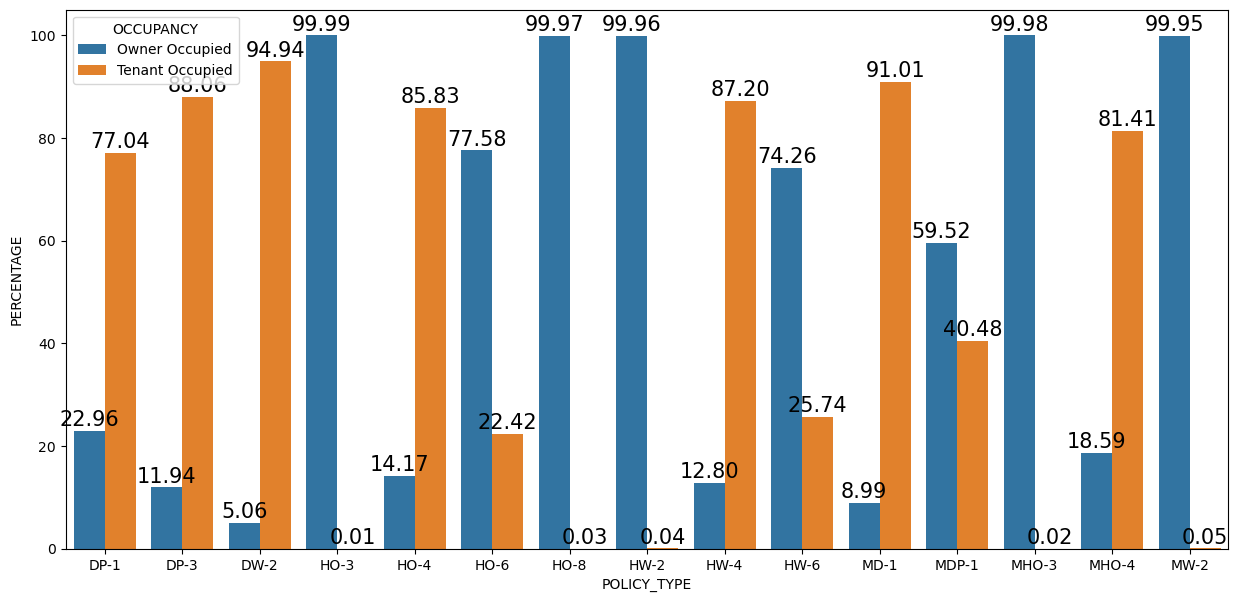

In [83]:
fig,ax=plt.subplots(1,1,figsize=(15,7))
plots = sns.barplot(data=pk,x='POLICY_TYPE',y='PERCENTAGE',hue='OCCUPANCY',ax=ax)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

## Flood related columns

In [85]:
df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].isna().sum()

85635

In [86]:
df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].value_counts()

No                             557411
Flood Affirmation Completed    207995
Flood Waiver Completed          87355
Yes                             81033
Applied For                     11295
Association Policy               2440
Name: IS_THERE_A_FLOOD_POLICY_IN_EFFECT, dtype: int64

In [ ]:
# reduced the number of categories from the column based on other columns

In [87]:
df.loc[(df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].str.contains('Waiver')) & (df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].notna()),'IS_THERE_A_FLOOD_POLICY_IN_EFFECT']='No'

In [88]:
df.loc[(df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].str.contains('Affirmation')) & (df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].notna()),'IS_THERE_A_FLOOD_POLICY_IN_EFFECT']='Yes'

In [89]:
df.loc[(df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].str.contains('Association')) & (df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].notna()),'IS_THERE_A_FLOOD_POLICY_IN_EFFECT']='Yes'

In [90]:
df.loc[(df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].str.contains('Applied')) & (df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].notna()),'IS_THERE_A_FLOOD_POLICY_IN_EFFECT']='No'

In [91]:
df.groupby(['FEMA_FLOOD_ZONE','IS_SPECIAL_FLOOD_ZONE'])['POLICY_NUMBER'].count()

FEMA_FLOOD_ZONE  IS_SPECIAL_FLOOD_ZONE
MFHA             No                       759240
                 Yes                          71
SFHA             No                          104
                 Yes                      273749
Name: POLICY_NUMBER, dtype: int64

In [92]:
df.groupby(['IS_SPECIAL_FLOOD_ZONE','IS_THERE_A_FLOOD_POLICY_IN_EFFECT'])['POLICY_NUMBER'].count()

IS_SPECIAL_FLOOD_ZONE  IS_THERE_A_FLOOD_POLICY_IN_EFFECT
No                     No                                   577353
                       Yes                                   98108
Yes                    No                                    78708
                       Yes                                  193360
Name: POLICY_NUMBER, dtype: int64

In [93]:
df.drop(columns=['IS_SPECIAL_FLOOD_ZONE'],inplace=True)

In [94]:
df[df.columns[df.columns.str.contains('FLOOD')]].isna().sum()

FEMA_FLOOD_ZONE                          0
IS_THERE_A_FLOOD_POLICY_IN_EFFECT    85635
dtype: int64

In [95]:
df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].value_counts()

No     656061
Yes    291468
Name: IS_THERE_A_FLOOD_POLICY_IN_EFFECT, dtype: int64

In [96]:
df.groupby(['FEMA_FLOOD_ZONE','IS_THERE_A_FLOOD_POLICY_IN_EFFECT'])['POLICY_NUMBER'].count()

FEMA_FLOOD_ZONE  IS_THERE_A_FLOOD_POLICY_IN_EFFECT
MFHA             No                                   577308
                 Yes                                   98120
SFHA             No                                    78753
                 Yes                                  193348
Name: POLICY_NUMBER, dtype: int64

In [97]:
df.loc[(df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].isna()) & (df['FEMA_FLOOD_ZONE']=='SFHA'),'IS_THERE_A_FLOOD_POLICY_IN_EFFECT']='Yes'

In [98]:
df.loc[(df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].isna()) & (df['FEMA_FLOOD_ZONE']=='MFHA'),'IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].unique()

array([nan], dtype=object)

In [99]:
df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].isna().sum()

83883

In [100]:
df['IS_RISK_WITHIN_CITY_LIMITS'].value_counts()

Yes    698764
No     334400
Name: IS_RISK_WITHIN_CITY_LIMITS, dtype: int64

In [101]:
df['IS_RISK_WITHIN_CITY_LIMITS'].isna().sum()

0

In [102]:
# df.groupby(['FEMA_FLOOD_ZONE','IS_RISK_WITHIN_CITY_LIMITS'])['POLICY_NUMBER'].count()

In [103]:
df['IS_DWELLING_ON_MASONARY'].value_counts()

Yes    818876
No     214288
Name: IS_DWELLING_ON_MASONARY, dtype: int64

In [104]:
df['IS_DWELLING_ON_MASONARY'].isna().sum()

0

## Property age and the YEAR BUILT AND DATE OCCUPIED columns

In [106]:
df.loc[df['YEAR_BUILT']<1850,'YEAR_BUILT'].shape

(6,)

In [107]:
inds = df.loc[df['YEAR_BUILT']<1850,'YEAR_BUILT'].index
df.drop(index=inds,inplace=True)

In [108]:
inds = df.loc[df['YEAR_BUILT']>2023,'YEAR_BUILT'].index
df.drop(index=inds,inplace=True)

In [109]:
df['DATE_OCCUPIED']=pd.to_datetime(df['DATE_OCCUPIED'],errors='coerce')

In [110]:
df.loc[df['DATE_OCCUPIED'].isna(),'DATE_OCCUPIED_YEAR']= 1974

In [111]:
df['DATE_OCCUPIED_YEAR']=df['DATE_OCCUPIED'].dt.year

In [112]:
inds= df.loc[df['YEAR_BUILT']>df['DATE_OCCUPIED_YEAR'],['YEAR_BUILT','DATE_OCCUPIED_YEAR']].index
inds

Int64Index([    327,     440,     601,    1307,    1618,    2283,    2397,
               2429,    2591,    2616,
            ...
            1022295, 1022445, 1024100, 1024521, 1028111, 1029014, 1029318,
            1031316, 1032354, 1033007],
           dtype='int64', length=662)

In [113]:
for i in inds:
    print(i)
    df.loc[i,'DATE_OCCUPIED_YEAR']=df.loc[i,'YEAR_BUILT']

327
440
601
1307
1618
2283
2397
2429
2591
2616
3546
4723
7390
7440
8256
9294
9861
9913
9979
10273
10278
10450
11046
11189
12210
12299
12682
13051
13152
13901
13977
14159
14536
14969
16334
17130
17240
17776
18500
18981
19397
19565
22022
23203
23251
23278
25238
25968
26768
27089
27601
28016
28398
28852
29307
32116
35254
35379
35798
36572
36731
37058
37316
37963
39360
40848
41266
42788
43187
43612
43906
44709
45556
46573
46902
49797
50585
51381
51979
52777
53067
54471
55164
55428
56657
57580
58110
58415
58773
59261
59296
60066
61075
61178
61966
62366
63706
63800
65420
65985
66521
67660
67699
67986
68022
68169
69507
71394
71968
72656
73220
73255
73992
75041
75052
76031
77125
77155
77683
77696
77866
78311
78871
79503
79611
79892
80207
80918
80958
81511
81518
82615
82754
83045
83175
83177
83517
84995
85270
85787
86424
87125
87251
87716
87778
88047
88973
89961
90208
90238
90568
90838
90862
91123
91133
91235
91402
91708
92357
92388
92729
92733
92931
93562
94003
94133
94150
95109
95155
95624
96

In [117]:
# df['PURCHASED_LEASED_DATE']=pd.to_numeric(df['PURCHASED_LEASED_DATE'],errors='coerce')

In [118]:
df['PURCHASED_LEASED_DATE']  =pd.to_datetime(df['PURCHASED_LEASED_DATE'],errors='coerce')

In [119]:
df[['PURCHASED_LEASED_DATE','DATE_OCCUPIED','YEAR_BUILT']].isna().sum()

PURCHASED_LEASED_DATE    0
DATE_OCCUPIED            1
YEAR_BUILT               0
dtype: int64

In [125]:
# df.loc[df['YEAR_BUILT']>df['PURCHASED_LEASED_YEAR'],['YEAR_BUILT','PURCHASED_LEASED_YEAR']]

In [ ]:
sns.boxplot(df['PURCHASED_LEASED_YEAR'] - df['YEAR_BUILT'])

A policy can be purchased in different options:
1. It can be purchased after the house has been built
2. It can be purchased after the fam has occupied in the house
3. It can also be purchased when the house is under constructiion

In [126]:
df['CONSTRUCTION'].value_counts()

Masonry                       754201
Frame                         146917
Masonry Veneer                 22422
Masonry Non-Combustible        14651
Fire Resistive                 13717
Superior                        8026
Plastic Siding over Frame       1179
Non-Combustible                  605
Aluminum Siding Over Frame       587
Modular                          116
Name: CONSTRUCTION, dtype: int64

In [127]:
df['CONSTRUCTION'].isna().sum()

70737

In [128]:
# fixed the missing values concept for the construction columns
df.loc[(df['IS_DWELLING_ON_MASONARY']=='Yes') & (df['CONSTRUCTION'].isna()),'CONSTRUCTION'] = 'Masonry'

In [130]:
df['COVERAGE_STRUCTURE'].value_counts()

Dwelling       962421
Mobile Home     70737
Name: COVERAGE_STRUCTURE, dtype: int64

In [132]:
df['TOTAL_AREA_OF_BUILDING_SQFEET'].isna().sum()

5899

In [135]:
d={}
for i in df['PROPERTY_ZIPCODE'].unique():
    k = df.loc[df['PROPERTY_ZIPCODE']==i,'TOTAL_AREA_OF_BUILDING_SQFEET'].mean()
    d[i] = k

In [136]:
for i in df['PROPERTY_ZIPCODE'].unique():
    df.loc[(df['TOTAL_AREA_OF_BUILDING_SQFEET'].isna()) & (df['PROPERTY_ZIPCODE']==i),'TOTAL_AREA_OF_BUILDING_SQFEET']=d[i]

In [137]:
inds= df.loc[df['TOTAL_AREA_OF_BUILDING_SQFEET'].isna()].index
df.drop(index=inds,inplace=True)

### Area and SQFT and the NUMBER OF  STOREYS

In [138]:
df['NUMBER_OF_STORIES'].isna().sum()

35472

In [139]:
inds =df.loc[df['NUMBER_OF_STORIES']==0].index
df.drop(index=inds,inplace=True)

In [141]:
df.shape

(1033156, 143)

The height, in feet, and the number of stories of a building shall be determined based on the type of construction, occupancy classification and whether there is an automatic sprinkler system installed throughout the building.

In [142]:
df.groupby('CONSTRUCTION')['NUMBER_OF_STORIES'].median()

CONSTRUCTION
Aluminum Siding Over Frame     1.0
Fire Resistive                13.0
Frame                          1.0
Masonry                        1.0
Masonry Non-Combustible        7.0
Masonry Veneer                 1.0
Modular                        1.0
Non-Combustible               12.0
Plastic Siding over Frame      1.0
Superior                       8.0
Name: NUMBER_OF_STORIES, dtype: float64

In [143]:
df['SPRINKLER_SYSTEM_TYPE'].value_counts()

None               986892
Class B-Full         1372
Class A-Partial      1244
Name: SPRINKLER_SYSTEM_TYPE, dtype: int64

In [144]:
for i in df['CONSTRUCTION'].unique():
    for j in df['OCCUPANCY'].unique():
        kk = df.loc[(df['OCCUPANCY']==j) & (df['CONSTRUCTION']==i),'NUMBER_OF_STORIES'].median()
        df.loc[(df['OCCUPANCY']==j) & (df['CONSTRUCTION']==i) & (df['NUMBER_OF_STORIES'].isna()),'NUMBER_OF_STORIES']=kk

<AxesSubplot: >

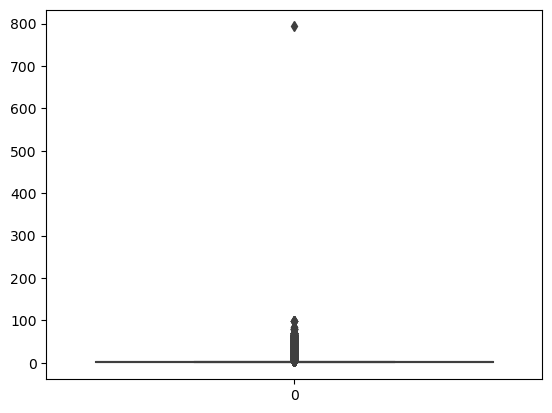

In [145]:
sns.boxplot(df['NUMBER_OF_STORIES'])

In [146]:
df['PROPERTY_CITY'].nunique(),df['PROPERTY_ZIPCODE'].nunique()

(711, 1003)

In [150]:
inds = df.loc[df['NUMBER_OF_STORIES']>30].index
print(inds)
df.drop(index=inds,inplace=True)

Int64Index([   1043,    1258,    1513,    1661,    1736,    2551,    2805,
               2954,    3088,    3137,
            ...
            1031229, 1031454, 1031483, 1031732, 1031845, 1032296, 1032509,
            1032574, 1032691, 1032704],
           dtype='int64', length=4763)


In [151]:
inds = df.loc[df['NUMBER_OF_STORIES']>20].index
df.drop(index=inds,inplace=True)

In [152]:
df['NUMBER_OF_STORIES'].isna().sum()

23705

In [153]:
df.loc[df['NUMBER_OF_STORIES'].isna(),'NUMBER_OF_STORIES']=0.0

In [ ]:
# df.loc[(df['FLOOR_UNIT_LOCATED_ON'].isna()) & (df['NUMBER_OF_STORIES']==0),'FLOOR_UNIT_LOCATED_ON'] = 0.0

In [ ]:
# df.groupby(['NUMBER_OF_STORIES','FLOOR_UNIT_LOCATED_ON'])["POLICY_NUMBER"].count()

In [155]:
inds= df.loc[df['NUMBER_OF_UNITS_IN_BUILDING']>150].index
df.drop(index=inds,inplace=True)

In [158]:
df['NUMBER_OF_UNITS_IN_BUILDING'].isna().sum()

68730

In [159]:
df.loc[(df['NUMBER_OF_UNITS_IN_BUILDING'].isna()) & (df['NUMBER_OF_STORIES']==0),'NUMBER_OF_UNITS_IN_BUILDING']=0 

In [162]:
inds = df.loc[df['NUMBER_OF_STORIES']>100].index
df.drop(index=inds,inplace=True)

In [164]:
df.loc[df['NUMBER_OF_UNITS_IN_BUILDING']>100].shape

(3200, 143)

In [165]:
df['NUMBER_OF_UNITS_IN_BUILDING'].isna().sum()

45025

In [166]:
roof_cols = df.columns[df.columns.str.contains('ROOF')]
roof_cols

Index(['ROOF_MATERIAL', 'YEAR_ROOF_UPDATE', 'ROOF_COVER', 'ROOF_SHAPE',
       'ROOF_DECK_ATTACH', 'ROOF_TO_WALL_ATTACH'],
      dtype='object')

In [167]:
df.drop(columns=roof_cols,inplace=True)

In [168]:
df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].value_counts()

No     646886
Yes    285049
Name: IS_THERE_A_FLOOD_POLICY_IN_EFFECT, dtype: int64

In [169]:
df.groupby(['FEMA_FLOOD_ZONE','IS_THERE_A_FLOOD_POLICY_IN_EFFECT'])['POLICY_NUMBER'].count()

FEMA_FLOOD_ZONE  IS_THERE_A_FLOOD_POLICY_IN_EFFECT
MFHA             No                                   572924
                 Yes                                   97216
SFHA             No                                    73962
                 Yes                                  187833
Name: POLICY_NUMBER, dtype: int64

In [170]:
df.loc[df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].isna(),'FEMA_FLOOD_ZONE'].value_counts()

MFHA    83540
Name: FEMA_FLOOD_ZONE, dtype: int64

In [171]:
df.loc[(df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].isna()) & (df['FEMA_FLOOD_ZONE']=='MFHA'),'IS_THERE_A_FLOOD_POLICY_IN_EFFECT']='No'

In [172]:
df['FEMA_FLOOD_ZONE'].value_counts()

MFHA    753680
SFHA    261795
Name: FEMA_FLOOD_ZONE, dtype: int64

In [173]:
df['IS_THERE_A_FLOOD_POLICY_IN_EFFECT'].isna().sum()

0

In [174]:
df['CONSTRUCTION'].value_counts()

Masonry                       767302
Frame                         146840
Masonry Veneer                 22355
Masonry Non-Combustible        11042
Fire Resistive                  8224
Superior                        5968
Plastic Siding over Frame       1178
Aluminum Siding Over Frame       585
Non-Combustible                  378
Modular                          116
Name: CONSTRUCTION, dtype: int64

In [175]:
df.loc[(df['IS_DWELLING_ON_MASONARY']=='Yes'),'CONSTRUCTION'].value_counts()

Masonry                       657969
Frame                         110734
Masonry Veneer                 19736
Masonry Non-Combustible         9759
Fire Resistive                  7042
Plastic Siding over Frame        988
Aluminum Siding Over Frame       468
Non-Combustible                  313
Modular                           80
Superior                          17
Name: CONSTRUCTION, dtype: int64

In [178]:
df.loc[df['CONSTRUCTION'].isna(),'CONSTRUCTION']='Masonry'

In [180]:
inds = df.loc[df['DATE_OCCUPIED'].isna()].index
df.drop(index=inds,inplace=True)

In [181]:
df['FLOOR_UNIT_LOCATED_ON'].value_counts()

1.0     891364
2.0      35160
3.0      12971
4.0       6830
5.0       3624
6.0       2179
7.0       1645
8.0       1387
9.0       1083
10.0       896
11.0       694
12.0       609
14.0       466
15.0       393
16.0       318
17.0       243
18.0       148
13.0       103
19.0        94
20.0        67
Name: FLOOR_UNIT_LOCATED_ON, dtype: int64

In [182]:
inds= df.loc[df['FLOOR_UNIT_LOCATED_ON']>10].index
df.drop(index=inds,inplace=True)

In [183]:
df.loc[df['FLOOR_UNIT_LOCATED_ON'].isna(),'NUMBER_OF_STORIES'].value_counts()

1.0    31467
0.0    23705
2.0       27
3.0        1
Name: NUMBER_OF_STORIES, dtype: int64

In [184]:
inds = df.loc[(df['NUMBER_OF_STORIES']>1)& (df['FLOOR_UNIT_LOCATED_ON'].isna()),'FLOOR_UNIT_LOCATED_ON'].index
df.drop(index=inds,inplace=True)

In [185]:
df.loc[(df['FLOOR_UNIT_LOCATED_ON'].isna())& (df['NUMBER_OF_STORIES']==0),'FLOOR_UNIT_LOCATED_ON']=0

In [186]:
df.loc[(df['FLOOR_UNIT_LOCATED_ON'].isna())& (df['NUMBER_OF_STORIES']==1),'FLOOR_UNIT_LOCATED_ON']=1

In [187]:
df.groupby(['NUMBER_OF_STORIES'])['FLOOR_UNIT_LOCATED_ON'].mean()

NUMBER_OF_STORIES
0.0     0.000000
1.0     1.000000
2.0     1.110076
3.0     1.733149
4.0     2.423455
5.0     2.931566
6.0     3.437885
7.0     3.908674
8.0     4.420190
9.0     4.965464
10.0    5.373362
11.0    5.529347
12.0    5.395694
13.0    5.438406
14.0    5.387205
15.0    5.641221
16.0    5.719346
17.0    5.608871
18.0    5.215139
19.0    5.556863
20.0    5.515831
Name: FLOOR_UNIT_LOCATED_ON, dtype: float64

In [188]:
ct = df.columns[df.columns.str.contains('CITIZENS')]
ct

Index(['CITIZENS_EMERGENCY_ASSESSMENT_AMOUNT', 'CITIZENS_EMERGENCY_ASSESSMENT_AMOUNT.1'], dtype='object')

In [189]:
df.loc[df['CITIZENS_EMERGENCY_ASSESSMENT_AMOUNT']!=df['CITIZENS_EMERGENCY_ASSESSMENT_AMOUNT.1']]

,POLICY_NUMBER,POLICY_TERM_NUMBER,POLICY_ENDORSEMENT_NUMBER,ACCOUNTING_COMPANY,PRODUCT_CATEGORY,POLICY_TYPE,HAS_POOL,IS_POOL_SCREENED,IS_POOL_FENCED,VICIOUS_ANIMALS_DESC,IS_DWELLING_ON_MASONARY,IS_MOBILE_HOME,PROTECTION_CLASS,WINDBORNE_DEBRIS_REGION,TERRAIN,IS_RISK_WITHIN_CITY_LIMITS,FEMA_FLOOD_ZONE,IS_THERE_A_FLOOD_POLICY_IN_EFFECT,YEAR_BUILT,CONSTRUCTION,TOTAL_AREA_OF_BUILDING_SQFEET,NUMBER_OF_STORIES,FLOOR_UNIT_LOCATED_ON,NUMBER_OF_UNITS_IN_BUILDING,TOTAL_LIVING_AREA_SQ_FEET,NUMBER_UNITS_IN_FIRE_DIVISION,ANY_PLUMBING_UNACCEPTABLE,ANY_HAZARDOUS_WIRING,ALUMINUM_WIRING_REMEDIATED,NUMBER_OF_AMPS,BCEG_CODE,PRIOR_CARRIER,WLM_BUILDING_TYPE,SECONDARY_WATER_RESISTANCE,OPENING_PROTECTION,CLASS_C_TYPE_GRANDFATHER,REPLACEMENT_COST,ALTERNATE_VALUATION_TYPE,MARKET_VALUE,PURCHASE_PRICE,ALTERNATE_VALUATION_ACV,DATE_OCCUPIED,RESIDENCE_TYPE,NUMBER_OF_FAMILIES,NUMBER_OF_BOARDERS,USAGETYPE,OCCUPANCY,MONTHS_UNOCCUPIED,FIRE_ALARM_TYPE,SPRINKLER_SYSTEM_TYPE,LOCKED_SECURITY_GATE,HAS_SECURITY_GUARD,COVERAGE_STRUCTURE,COVERAGE_A_DWELLING,COVERAGE_CONDO_UNIT_OWNER_LIMIT,COVERAGE_A_LOSS_SETTLEMENT,COVERAGE_B_OTHER_STRUCTURES_PERCENT,COVERAGE_B_OTHER_STRUCTURES_AMOUNT,COVERAGE_C_PERSONAL_PROPERTY_AMOUNT,COVERAGE_C_PERSONAL_PROPERTY_PERCENT,COVERAGE_C_LOSS_SETTLEMENT,COVERAGE_D_LOSS_OF_USE,COVERAGE_PERSONAL_LIABILITY_AMOUNT,COVERAGE_MEDICAL_PAYMENT_AMOUNT,PERSONAL_PROPERTY_REPLACEMENT_COST,SINKHOLE_LOSS_COVERAGE,COVERAGE_MOLD_PROPERTY_AMOUNT,COVERAGE_MOLD_LIABILITY_AMOUNT,COVERAGE_LOSS_ASSESMENT_AMOUNT,COVERAGE_ORDINANCE_LAW_LIMIT,COVERAGE_ORDINANCE_LAW_LIMIT_OF_LIABILITY,PREMIUM_SUBTOTAL,TOTAL_PREMIUM,BCEGS_MITIGATION_DISCOUNT,WLM_DISCOUNT,FIRE_PREMIUM_AMOUNT,WATER_PREMIUM_AMOUNT,LIABILITY_MEDICAL_PREMIUM_AMOUNT,AOP_PREMIUM_AMOUNT,SINKHOLE_PREMIUM_AMOUNT,THEFT_PREMIUM_AMOUNT,VMM_PREMIUM_AMOUNT,HURRICANE_PREMIUM_AMOUNT,OTHER_WIND_PREMIUM_AMOUNT,COVERAGE_A_DWELLING_SPECIAL_PREMIUM_COVERAGE,LOSS_ASSESSMENT_COVERAGE_AMOUNT,UNITS_REGULARLY_RENTED_TO_OTHERS_PREMIUM_AMOUNT,LIENHOLDER_SINGLE_INTEREST_PREMIUM_AMOUNT,INCREASED_ORDINANCE_LAW_PREMIUM_AMOUNT,CONDO_INCREASED_COVERAGE_A_PREMIUM_AMOUNT,BUILDING_ITEMS_GROUPI_PREMIUM,BUILDING_ITEMS_GROUPII_PREMIUM,IMPROVEMENTS_ALTER_GROUPI_PREMIUM_AMOUNT,IMPROVEMENTS_ALTER_GROUPII_PREMIUM_AMOUNT,TAX_EXEMPT_SRCHG_BGI_AMOUNT,TAX_EXEMPT_SRCHG_BGII_AMOUNT,MINIMUM_PREMIUM_AMOUNT,FHCF_BUILDUP_PREMIUM_AMOUNT,FIGA_2012_ASSESSMENT_AMOUNT,CITIZENS_EMERGENCY_ASSESSMENT_AMOUNT,FL_CATASTROPHE_FUND_AMOUNT,CITIZENS_EMERGENCY_ASSESSMENT_AMOUNT.1,TAX_EXEMPT_SRCHG_AMOUNT,CATASTROPHE_FUND_SURG_AMOUNT,HURRICANE_DEDUCTIBLE_PERCENT,HURRICANE_DEDUCTIBLE_AMOUNT,ALL_OTHER_PERILS,SINKHOLE_DEDUCTIBLE_AMOUNT,WIND_HAIL_DEDUCTIBLE_PERCENT,WIND_HAIL_DEDUCTIBLE_AMOUNT,IS_WIND_COVERAGE_EXCLUDED,HURRICANE_WIND_MITIGATION_FACTOR,VANDALISM_MALICIOUS_MISCHIEF,EXTENDED_COVERAGE,ENDHO0490,ENDHO1732,ENDHO1733,ENDHW1733,ENDMH0404,CURRENT_TERM_UNCAPPED_PREMIUM,NUMBER_OF_INSPECTIONS,PRIOR_POLICY_NUMBER_y,PURCHASED_LEASED_DATE,BILLING_METHOD,PAY_PLAN,PROPERTY_CITY,PROPERTY_STATE,PROPERTY_ZIPCODE,PROPERTY_COUNTY,AGENCY_NAME,AGENCY_FEIN,AGENCY_PHYSICAL_ADDRESS_CITY,AGENCY_PHYSICAL_ADDRESS_STATE,AGENCY_PHYSICAL_ADDRESS_ZIP_CODE,PROPERTY_ADDRESS,AGENCY_ADDRESS,DATE_OCCUPIED_YEAR


In [190]:
df.drop(columns=['CITIZENS_EMERGENCY_ASSESSMENT_AMOUNT.1'],inplace=True)

In [191]:
df.loc[(df['NUMBER_OF_UNITS_IN_BUILDING'].isna()) & (df['NUMBER_OF_STORIES']==1),'NUMBER_OF_UNITS_IN_BUILDING']=0

In [192]:
df['NUMBER_OF_STORIES'].value_counts()

1.0     737465
2.0     185017
3.0      26704
0.0      23705
4.0      13626
5.0       6941
6.0       3574
8.0       2318
10.0      2290
7.0       2179
12.0      1347
9.0       1303
15.0      1048
11.0       903
20.0       758
16.0       734
14.0       594
13.0       552
18.0       502
17.0       496
19.0       255
Name: NUMBER_OF_STORIES, dtype: int64

In [197]:
inds = df.loc[df['TOTAL_AREA_OF_BUILDING_SQFEET']<120].index
df.drop(index=inds,inplace=True)

In [198]:
inds = df.loc[df['TOTAL_AREA_OF_BUILDING_SQFEET']>3000].index
df.drop(index=inds,inplace=True)

In [199]:
df.loc[df['TOTAL_LIVING_AREA_SQ_FEET'].isna(),'TOTAL_LIVING_AREA_SQ_FEET']=df['TOTAL_LIVING_AREA_SQ_FEET'].mean()

In [200]:
df['TOTAL_LIVING_AREA_SQ_FEET'].mean()

1521.5110649309026

## House characterstics

In [202]:
df.loc[df['NUMBER_UNITS_IN_FIRE_DIVISION']=='9 or more','NUMBER_UNITS_IN_FIRE_DIVISION']='9'

In [203]:
df['NUMBER_UNITS_IN_FIRE_DIVISION']=pd.to_numeric(df['NUMBER_UNITS_IN_FIRE_DIVISION'],errors='coerce')

In [204]:
df.groupby(['NUMBER_OF_UNITS_IN_BUILDING','NUMBER_UNITS_IN_FIRE_DIVISION'])['POLICY_NUMBER'].count()

NUMBER_OF_UNITS_IN_BUILDING  NUMBER_UNITS_IN_FIRE_DIVISION
0.0                          1.0                               67884
                             3.0                                   1
1.0                          1.0                              664713
2.0                          1.0                               19963
                             2.0                                7810
                                                               ...  
150.0                        1.0                                 271
                             2.0                                   2
                             3.0                                   1
                             4.0                                   2
                             9.0                                   6
Name: POLICY_NUMBER, Length: 527, dtype: int64

In [205]:
df.loc[(df['NUMBER_UNITS_IN_FIRE_DIVISION'].isna()) & (df['NUMBER_OF_UNITS_IN_BUILDING']==0),'NUMBER_UNITS_IN_FIRE_DIVISION']=1

In [206]:
df.loc[df['NUMBER_UNITS_IN_FIRE_DIVISION'].isna(),'TOTAL_AREA_OF_BUILDING_SQFEET'].unique()

array([2036., 2417., 1989., ...,  221.,  190.,  288.])

In [207]:
df.groupby(['NUMBER_UNITS_IN_FIRE_DIVISION'])['TOTAL_AREA_OF_BUILDING_SQFEET'].mean()

NUMBER_UNITS_IN_FIRE_DIVISION
1.0    1544.322188
2.0    1689.927673
3.0    1881.329197
4.0    1543.470703
5.0    1362.183511
6.0    1351.812863
7.0    1468.038835
8.0    1155.060899
9.0     988.621277
Name: TOTAL_AREA_OF_BUILDING_SQFEET, dtype: float64

In [209]:
df['NUMBER_UNITS_IN_FIRE_DIVISION'].value_counts()

1.0    822953
2.0      9392
9.0      1709
4.0      1640
3.0      1182
6.0       417
8.0       407
5.0       300
7.0       103
Name: NUMBER_UNITS_IN_FIRE_DIVISION, dtype: int64

In [210]:
df.drop(columns=['NUMBER_UNITS_IN_FIRE_DIVISION'],inplace=True)

In [211]:
df['ANY_HAZARDOUS_WIRING'].value_counts()

None of the Above    895585
Other                  8006
Aluminum Branch        1775
Copper Wiring          1248
Knob and Tube             1
Name: ANY_HAZARDOUS_WIRING, dtype: int64

In [212]:
df['ANY_PLUMBING_UNACCEPTABLE'].value_counts()

None            805621
Unknown          98799
Polybutylene      2195
Name: ANY_PLUMBING_UNACCEPTABLE, dtype: int64

In [213]:
df.drop(columns=['ANY_PLUMBING_UNACCEPTABLE','ANY_HAZARDOUS_WIRING'],inplace=True)

In [214]:
df.shape

(979379, 133)

In [215]:
df.columns[df.columns.str.contains('AGEN')]

Index(['AGENCY_NAME', 'AGENCY_FEIN', 'AGENCY_PHYSICAL_ADDRESS_CITY',
       'AGENCY_PHYSICAL_ADDRESS_STATE', 'AGENCY_PHYSICAL_ADDRESS_ZIP_CODE',
       'AGENCY_ADDRESS'],
      dtype='object')

In [218]:
# df.drop(columns=['PROPERTY_ADDRESS_LINE1','AGENCY_ID','AGENCY_PHYSICAL_ADDRESS_LINE_1'],inplace=True)

In [219]:
df['BCEG_CODE'].value_counts()

Ungraded             729663
04                    78426
03                    62407
02                    23151
05                    11033
06                     1415
08                      942
Non-Participating       899
01                      369
07                      299
09                       24
10                       14
01 - Ind. Grading        11
Name: BCEG_CODE, dtype: int64

In [221]:
df.drop(columns=['BCEG_CODE'],inplace=True)

In [222]:
df['NUMBER_OF_AMPS'].value_counts()

100 or more Amps      903335
Less than 100 Amps      3280
Name: NUMBER_OF_AMPS, dtype: int64

In [223]:
df["WLM_BUILDING_TYPE"].value_counts()

1-4 Units    814331
Type I        59166
Type II       21762
Type III      13504
Name: WLM_BUILDING_TYPE, dtype: int64

In [224]:
df['ALUMINUM_WIRING_REMEDIATED'].value_counts()

No     977631
Yes      1748
Name: ALUMINUM_WIRING_REMEDIATED, dtype: int64

In [225]:
df['SECONDARY_WATER_RESISTANCE'].value_counts()

UNKNOWN    419989
NO         371829
YES        121031
Name: SECONDARY_WATER_RESISTANCE, dtype: int64

In [226]:
df['OPENING_PROTECTION'].value_counts()

None       469442
Class A    239807
Unknown    208011
Class B      4118
Class C      2846
Name: OPENING_PROTECTION, dtype: int64

In [227]:
df['CLASS_C_TYPE_GRANDFATHER'].value_counts()

No     962210
Yes      1991
Name: CLASS_C_TYPE_GRANDFATHER, dtype: int64

In [228]:
df['REPLACEMENT_COST'].isna().sum()

167780

### removed the columns with most missing values

In [229]:
df.drop(columns=['NUMBER_OF_AMPS','WLM_BUILDING_TYPE','ALUMINUM_WIRING_REMEDIATED','SECONDARY_WATER_RESISTANCE','OPENING_PROTECTION','CLASS_C_TYPE_GRANDFATHER',
                ],inplace=True)

In [230]:
coverage_cols = df.columns[df.columns.str.contains("COVERAGE")]

In [231]:
df[coverage_cols].isna().sum()

COVERAGE_STRUCTURE                                  0
COVERAGE_A_DWELLING                                 0
COVERAGE_CONDO_UNIT_OWNER_LIMIT                     0
COVERAGE_A_LOSS_SETTLEMENT                      50844
COVERAGE_B_OTHER_STRUCTURES_PERCENT                 0
COVERAGE_B_OTHER_STRUCTURES_AMOUNT                  0
COVERAGE_C_PERSONAL_PROPERTY_AMOUNT                 0
COVERAGE_C_PERSONAL_PROPERTY_PERCENT                0
COVERAGE_C_LOSS_SETTLEMENT                          0
COVERAGE_D_LOSS_OF_USE                              0
COVERAGE_PERSONAL_LIABILITY_AMOUNT                  0
COVERAGE_MEDICAL_PAYMENT_AMOUNT                     0
SINKHOLE_LOSS_COVERAGE                              0
COVERAGE_MOLD_PROPERTY_AMOUNT                       0
COVERAGE_MOLD_LIABILITY_AMOUNT                      0
COVERAGE_LOSS_ASSESMENT_AMOUNT                      0
COVERAGE_ORDINANCE_LAW_LIMIT                        0
COVERAGE_ORDINANCE_LAW_LIMIT_OF_LIABILITY           0
COVERAGE_A_DWELLING_SPECIAL_

In [232]:
df["RESIDENCE_TYPE"].value_counts()

Dwelling                 718331
Unit Owner               116567
Townhouse or Rowhouse     69361
Apartment Complex          4503
Name: RESIDENCE_TYPE, dtype: int64

In [233]:
df['COVERAGE_STRUCTURE'].value_counts()

Dwelling       908762
Mobile Home     70617
Name: COVERAGE_STRUCTURE, dtype: int64

In [234]:
df.loc[(df['RESIDENCE_TYPE'].isna()) & (df['COVERAGE_STRUCTURE']=='Mobile Home')].shape

(70617, 126)

In [235]:
df.groupby(['POLICY_TYPE',])['REPLACEMENT_COST'].mean()

POLICY_TYPE
DP-1     233813.049566
DP-3     233041.865302
DW-2     286291.309980
HO-3     261595.243103
HO-4               NaN
HO-6               NaN
HO-8     182449.616259
HW-2     303679.293998
HW-4               NaN
HW-6               NaN
MD-1               NaN
MDP-1     50939.783821
MHO-3     54334.780059
MHO-4              NaN
MW-2               NaN
Name: REPLACEMENT_COST, dtype: float64

In [236]:
df['CONSTRUCTION'].value_counts()

Masonry                       792886
Frame                         140303
Masonry Veneer                 21257
Masonry Non-Combustible        10302
Fire Resistive                  7362
Superior                        5089
Plastic Siding over Frame       1159
Aluminum Siding Over Frame       571
Non-Combustible                  334
Modular                          116
Name: CONSTRUCTION, dtype: int64

In [237]:
df["RESIDENCE_TYPE"].value_counts()

Dwelling                 718331
Unit Owner               116567
Townhouse or Rowhouse     69361
Apartment Complex          4503
Name: RESIDENCE_TYPE, dtype: int64

In [238]:
df['OCCUPANCY'].value_counts()

Owner Occupied     763507
Tenant Occupied    215872
Name: OCCUPANCY, dtype: int64

In [239]:
df['MONTHS_UNOCCUPIED'].value_counts()

None                                              922972
May June July August September October              7201
May June July August September                      3002
April May June July August September                2996
June July August                                    2292
                                                   ...  
January April June July October November               1
April May July September October November              1
February March May June July September October         1
January March May October November                     1
May July September November December                   1
Name: MONTHS_UNOCCUPIED, Length: 2711, dtype: int64

In [240]:
df.drop(columns=['MONTHS_UNOCCUPIED'],inplace=True)

In [241]:
df['FIRE_ALARM_TYPE'].value_counts()

None               897650
Central Station     42732
Name: FIRE_ALARM_TYPE, dtype: int64

In [242]:
df.drop(columns=['FIRE_ALARM_TYPE'],inplace=True)

In [249]:
df.loc[df['REPLACEMENT_COST'].isna(),'POLICY_TYPE'].unique()

array(['MDP-1', 'MHO-3', 'DP-3', 'HO-6', 'HW-6', 'MD-1', 'MW-2', 'HO-4',
       'HW-4', 'MHO-4', 'DP-1', 'DW-2', 'HO-3', 'HW-2'], dtype=object)

In [253]:
df.drop(columns=['ALTERNATE_VALUATION_ACV','ALTERNATE_VALUATION_TYPE'],inplace=True)

In [254]:
df['USAGETYPE'].value_counts()

Primary                 706407
Rental Property         206140
Secondary                30192
Seasonal(3-6 months)     24386
Seasonal                  7547
Seasonal(>6 months)       2802
Seasonal-Rental           1888
Farm/Ranch                  17
Name: USAGETYPE, dtype: int64

In [255]:
df.loc[df['USAGETYPE'].str.contains('Seasonal'),'USAGETYPE']='Seasonal'

In [256]:
df.loc[df['USAGETYPE'].str.contains('Farm'),'USAGETYPE']='Primary'

In [257]:
df['USAGETYPE'].isna().sum()

0

In [259]:
for i in df['POLICY_TYPE'].value_counts().index:
    k =df.loc[df['POLICY_TYPE']==i,'USAGETYPE'].value_counts().index
    for j in k:
        pk =df.loc[(df['USAGETYPE']==j) & (df['POLICY_TYPE']==i),'REPLACEMENT_COST'].median()
        df.loc[(df['REPLACEMENT_COST'].isna())&(df['USAGETYPE']==j) & (df['POLICY_TYPE']==i),'REPLACEMENT_COST']=pk

In [260]:
df['REPLACEMENT_COST'].isna().sum()

84675

In [263]:
df.loc[df['RESIDENCE_TYPE'].isna(),'RESIDENCE_TYPE']='Mobile Home'

In [264]:
df['NUMBER_OF_BOARDERS'].value_counts()

0    910150
1     48926
2     19024
4       681
3       553
5        44
6         1
Name: NUMBER_OF_BOARDERS, dtype: int64

In [265]:
inds= df.loc[df['NUMBER_OF_BOARDERS']>5].index
df.drop(index=inds,inplace=True)

In [266]:
kk = df.loc[df['REPLACEMENT_COST'].isna(),'CONSTRUCTION'].unique()
kk

array(['Fire Resistive', 'Masonry', 'Superior', 'Frame',
       'Masonry Non-Combustible', 'Masonry Veneer', 'Non-Combustible',
       'Aluminum Siding Over Frame', 'Plastic Siding over Frame',
       'Modular'], dtype=object)

In [268]:
for i in kk:
    p = df.loc[(df['CONSTRUCTION']==i) & (df['REPLACEMENT_COST'].notna()),'REPLACEMENT_COST'].median()
    df.loc[(df['CONSTRUCTION']==i) & (df['REPLACEMENT_COST'].isna()),'REPLACEMENT_COST']=p

In [269]:
df['USAGETYPE'].value_counts()

Primary            706424
Rental Property    206139
Seasonal            36623
Secondary           30192
Name: USAGETYPE, dtype: int64

In [270]:
df['OCCUPANCY'].value_counts()

Owner Occupied     763507
Tenant Occupied    215871
Name: OCCUPANCY, dtype: int64

SPRINKLER_SYSTEM_TYPE

LOCKED_SECURITY_GATE

HAS_SECURITY_GUARD

In [271]:
df['SPRINKLER_SYSTEM_TYPE'].value_counts()

None               938754
Class B-Full          866
Class A-Partial       761
Name: SPRINKLER_SYSTEM_TYPE, dtype: int64

In [272]:
df.loc[df['SPRINKLER_SYSTEM_TYPE']!='None','POLICY_TYPE'].unique()

array(['HW-2', 'DW-2', 'HW-6', 'MD-1', 'MW-2', 'DP-3', 'HO-6', 'HW-4',
       'HO-4', 'HO-3', 'DP-1', 'MHO-3'], dtype=object)

In [273]:
df['LOCKED_SECURITY_GATE'].value_counts()

No     867101
Yes     61021
Name: LOCKED_SECURITY_GATE, dtype: int64

In [274]:
df['HAS_SECURITY_GUARD'].value_counts()

No     874816
Yes     31798
Name: HAS_SECURITY_GUARD, dtype: int64

In [275]:
df.drop(columns=['SPRINKLER_SYSTEM_TYPE','HAS_SECURITY_GUARD','LOCKED_SECURITY_GATE'],inplace=True)

In [286]:
df['ALL_OTHER_PERILS'].value_counts()

2500.0    568835
1000.0    192368
500.0     145411
Name: ALL_OTHER_PERILS, dtype: int64

In [287]:
df.drop(columns=["WLM_DISCOUNT",'ALL_OTHER_PERILS'],inplace=True)

In [280]:
df.drop(columns=["BCEGS_MITIGATION_DISCOUNT"],inplace=True)

In [283]:
df.drop(columns=["PRIOR_CARRIER",'VICIOUS_ANIMALS_DESC'],inplace=True)

In [289]:
df.shape

(979378, 114)

In [290]:
df.to_csv('meth_v4.csv',index_label=False)

In [1]:
# Load the next Data_cleaning_v3 and use the meth_v4.csv file for it

In [2]:
## There are couple more cleaning steps for the data